#  Mengimpor Library 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data Preprocessing

Proses pengolahan dataset sebelum mengimplementasikan proses K-Means Clustering. Seperti memasukkan kolom data yang dibutuhkan untuk melakukan klusterisasi serta membuang record yang memiliki nilai NaN supaya program dapat berjalan dengan semestinya.

In [148]:
dataset = pd.read_csv("waterquality.csv")
dataset = dataset.dropna()
X = dataset.iloc[:, 3:11].values

In [149]:
dataset # Melihat tabel dataset yang telah dihilangkan record yang mempunyai nilai NaN.

,STATION CODE,LOCATIONS,STATE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,1312,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",MAHARASHTRA,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,2177,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,MAHARASHTRA,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,2182,GODAVARI RIVER AT SAIKHEDA.,MAHARASHTRA,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,2179,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",MAHARASHTRA,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,2183,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,MAHARASHTRA,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0
...,...,...,...,...,...,...,...,...,...,...,...
529,2940,"GAPE- SAGAR LAKE, DUNGARPUR, RAJASTHAN",RAJASTHAN,23.2,4.4,8.1,538.0,1.2,1.00,5.0,14.0
530,2941,"LAKE JAISAMAND, SALUMBER, UDAIPUR, POINT NO. 1...",RAJASTHAN,22.9,5.6,8.4,591.0,1.1,3.00,4.0,8.0
531,2942,"LAKE JAISAMAND, SALUMBER, UDAIPUR, POINT NO. 2...",RAJASTHAN,22.9,5.8,8.5,588.0,1.2,3.00,4.0,6.0
532,2943,"LODHA TALAB, BANSWARA- DUNGARPUR ROAD, BANSWAR...",RAJASTHAN,28.7,4.1,7.9,1133.0,2.3,2.00,7.0,67.0


# Menggunakan Metode Elbow 

Metode Elbow digunakan untuk menentukan jumlah kluster yang paling optimal.

C:\Users\Harya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


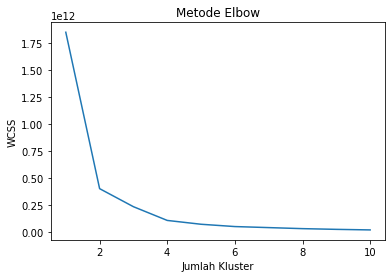

In [129]:
from sklearn.cluster import KMeans 

#impor library KMeans dari sklearn

#Melakukan perulangan untuk mendapatkan jumlah kluster yang sesuai
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) #training data 
    wcss.append(kmeans.inertia_)
    
# Membuat plot tabel hasil pengujian jumlah kluster dari metode Elbow
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Kluster')
plt.ylabel("WCSS")
plt.show()

# Training K-Means Model Pada Dataset

Setelah mendapatkan jumlah klaster yang sesuai yang ditunjukkan pada patahan penurunan grafik, maka jumlah kluster tersebut akan digunakan untuk melatih model K-Means pada dataset uji. Pada kasus ini jumlah kluster yang paling optimal adalah 4 kluster.

In [130]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
# Membuat Dependent Variable

# Hasil Klusterisasi K-Means

In [151]:
y_kmeans 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 3, 2, 2, 1, 2, 1, 3, 3, 0, 3,
       0, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Visualisasi Data

Hasil dari klusterisasi K-Means akan mengklasifikasikan data kedalam empat kategori yaitu kategori 0, 1, 2, dan 3. 

In [153]:
dataset['Kluster'] = y_kmeans.tolist()
dataset

,STATION CODE,LOCATIONS,STATE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,Kluster
0,1312,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",MAHARASHTRA,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0,0
1,2177,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,MAHARASHTRA,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0,0
2,2182,GODAVARI RIVER AT SAIKHEDA.,MAHARASHTRA,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0,0
3,2179,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",MAHARASHTRA,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0,0
4,2183,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,MAHARASHTRA,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
529,2940,"GAPE- SAGAR LAKE, DUNGARPUR, RAJASTHAN",RAJASTHAN,23.2,4.4,8.1,538.0,1.2,1.00,5.0,14.0,0
530,2941,"LAKE JAISAMAND, SALUMBER, UDAIPUR, POINT NO. 1...",RAJASTHAN,22.9,5.6,8.4,591.0,1.1,3.00,4.0,8.0,0
531,2942,"LAKE JAISAMAND, SALUMBER, UDAIPUR, POINT NO. 2...",RAJASTHAN,22.9,5.8,8.5,588.0,1.2,3.00,4.0,6.0,0
532,2943,"LODHA TALAB, BANSWARA- DUNGARPUR ROAD, BANSWAR...",RAJASTHAN,28.7,4.1,7.9,1133.0,2.3,2.00,7.0,67.0,0


In [154]:
# Mengeksport hasil dari dataframe yang telah terklasifikasi menjadi file csv
dataset.to_csv(r'C:\Users\Harya\Desktop\hasilDataBaru.csv', index = False)